<IPython.core.display.Javascript object>


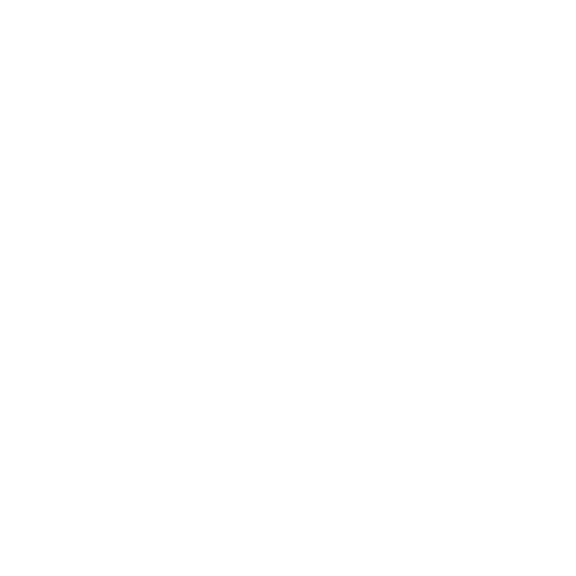

In [1]:
import sys
sys.path.append('../scripts/')
from mcl import*

In [2]:
class GlobalMcl(Mcl):
    def __init__(self, envmap,  num, motion_noise_stds = {"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},\
                distance_dev_rate = 0.14, direction_dev = 0.05):
        super().__init__(envmap, np.array([0,0,0]).T, num, motion_noise_stds, distance_dev_rate, direction_dev)
        # 粒子を最初だけ範囲内にばらまく
        for p in self.particles:
            p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
            

In [4]:
def trial(animation):
    time_interval = 0.1
    world = World(30,time_interval,debug = not animation)
    
    m = Map()
    for ln in [(-4,2),(2,-3),(3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)
    
    initial_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalMcl(m,  100)
    a = EstimationAgent(time_interval,0.2,10.0 / 180 * math.pi,pf)
    r = Robot(initial_pose,sensor = Camera(m),agent = a,color = "red") # このカメラ、ファントム、オクルージョン...全部込み込み
    world.append(r)
    
    world.draw()
    return (r.pose, pf.pose)

In [10]:
""""
if __name__ =='__main__':
    ok = 0
    for i in range(1000):
        actual, estm = trial(False)
        diff = math.sqrt((actual[0] - estm[0]) ** 2 + (actual[1] - estm[1]) **2)
        print("真:", actual, "推定:", estm, "誤差:", diff)
        if diff <= 0:
            ok += 1
            
    ok
"""""

'"\nif __name__ ==\'__main__\':\n    ok = 0\n    for i in range(1000):\n        actual, estm = trial(False)\n        diff = math.sqrt((actual[0] - estm[0]) ** 2 + (actual[1] - estm[1]) **2)\n        print("真:", actual, "推定:", estm, "誤差:", diff)\n        if diff <= 0:\n            ok += 1\n            \n    ok\n'

<IPython.core.display.Javascript object>


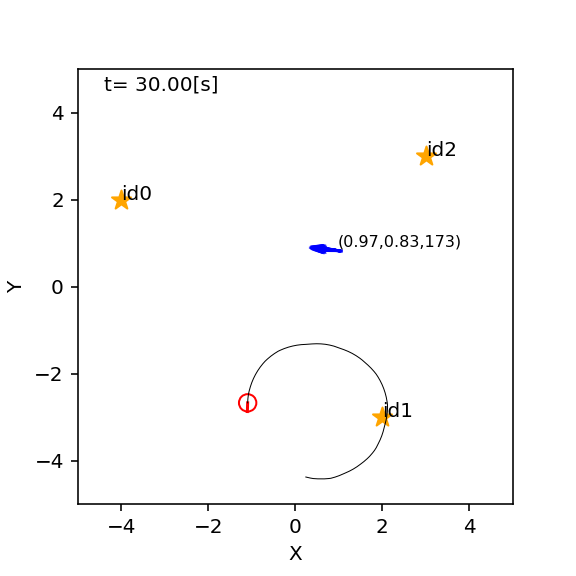

(array([ 0.24438796, -4.37943864, -0.26215022]), array([0, 0, 0]))

In [9]:
trial(True)
# 最初にランダムに粒子をばらまいて位置推定できるか